# Python para Geociencias

### Víctor Rojas
#### vr.rojaspozo@gmail.com

Esto es parte de las notas de [**Python para Geociencias**](https://github.com/vrrp/Workshop2018Python)  

# 10. Introducción a la estadística

La estadística es una disciplina que usa las matemáticas como herramienta para la gestión y análisis de datos obtenidos de la realidad, con la finalidad de inferir conclusiones respecto a ellos. Los estadísticos más importantes que veremos a continuación son:
* La media muestral $(\mathbf{\bar{X}})$
* La desviación típica muestral $(\mathbf{\sigma})$
* La varianza muestral $(\mathbf{\sigma}^{2})$
* La covarianza muestral $(\mathbf{s}_{XY})$
* Coeficiente de correlación lineal de Pearson $(\mathbf{r}_{XY})$
* Regresión lineal.

En el directorio **data** se encuentra el archivo **resist_temp.csv** que contiene mediciones de un termistor a diferentes temperaturas. Estos datos serán el conjunto de datos muestral.

In [3]:
import numpy as np
#x, y = np.loadtxt("./data/resist_temp.csv", delimiter=',',skiprows=0, usecols=(0, 2), unpack=True)

filename = "./data/resist_temp.csv"
def getDataCol(filename, ncol):
    fillValue = 999
    file = open(filename,'r')
    dataCol = []
    for line in file.readlines():
        l = line.replace('\n','').split(',')
        if type(l[ncol])=="str":
            try:
                dataCol.append(float(l[ncol]))
            except (RuntimeError, ValueError, TypeError, NameError):
                dataCol.append(fillValue)
        else: dataCol.append(l[ncol])                
    return dataCol

col0 = getDataCol(filename, 0)        
col1 = getDataCol(filename, 1)
col2 = getDataCol(filename, 2)

for i,j,k in zip(col0,col1,col2):
    print("{0:10} {1:15} {2}".format(i,j,k))
    
col0 = np.array(col0[1:])
temp = np.array(col1[1:], np.int32)
r1 = np.array(col2[1:], np.int32)

for i,j,k in zip(col0, temp, r1):
    print("{0:10} {1:15} {2}".format(i,j,k))


LECTURAS   TEMPERATURAS    R1
1          0               1426
2          5               1177
3          10              930
4          15              750
5          20              563
6          25              523
7          30              382
8          35              320
9          40              273
10         45              223
11         50              187
12         55              160
13         60              134
14         65              117
15         70              101
16         75              87
1                        0 1426
2                        5 1177
3                       10 930
4                       15 750
5                       20 563
6                       25 523
7                       30 382
8                       35 320
9                       40 273
10                      45 223
11                      50 187
12                      55 160
13                      60 134
14                      65 117
15                      70 101
16    

Una representación gráfica de los datos facilita su análisis  e interpretación. Para este fin se hará uso del  paquete **matplotlib**, el cual se tratará con mayor detalle en el capítulo 10.

## * La media muestral $(\mathbf{\bar{X}})$
Son las medidas de tendencia central ampliamente usadas para describir una variable. Nos indica en donde se ubican los valores centrales de ls datos.

### $$\mathbf{\bar{X}} = \frac{1}{n} \sum_{i=1}^{n}x_{i} 
 $$

In [52]:
def media(muestra):
    total = 0
    for i in muestra:
        total += i
    media = total / len(muestra)
    return media

print("temp = ", temp)
print("media(temp) = ", media(temp))

print("\nnumpy: media(temp) = ", np.mean(temp))


temp =  [ 0  5 10 15 20 25 30 35 40 45 50 55 60 65 70 75]
media(temp) =  37.5

numpy: media(temp) =  37.5


## * Desviación típica muestral $(\mathbf{\sigma}_{x})$
Es una medida del **grado de dispersión** de los datos con respecto al valor promedio.

### $$ \mathbf{\sigma}_{x} = \sqrt{\frac{\sum_{i=1}^{n}(x_{i} - \bar{X})^{2}}{n}}
 $$

In [41]:
def des_estandar(muestra):
    total = 0
    print(muestra)
    
    for i in muestra:
        total += i
    media = total / len(muestra)
    total = 0
    for i in muestra:
        total += (i - media) ** 2
    desviacion = (total / len(muestra)) ** 0.5
    return desviacion

[1426 1182  940  765  583  548  412  355  313  268  237  215  194  182  171
  162]


## * Varianza muestral $(\mathbf{S}_{x})$
La varianza muestral también es una medida de dispersión de un conjunto de datos y está definida por la siguinetne expresión.


### $$ \mathbf{S}_{x}=\mathbf{\sigma}^{2}_{x} = \frac{\sum_{i=1}^{n}(x_{i} - \bar{X})^{2}}{n}
$$

In [ ]:
def varianza(muestra):
    total = 0
    print(muestra)
    
    for i in muestra:
        total += i
    media = total / len(muestra)
    total = 0
    for i in muestra:
        total += (i - media) ** 2
    varianza = (total / len(muestra)) 
    return varianza

## * Covarianza $(\mathbf{S}_{xy})$
La covarianza mide la relación lineal entre dos variables.
Se dice que dos variables están **variando conjuntamente, y en el mismo sentido**, cuando al crecer los valores de una de las variables tmabién aumenta los de la otra.
En cambio, están **variando conjuntamente, pero en sentido contrario**, cuando al aumentar los valores de una, los de la otra disminuyen.

$$ \mathbf{S}_{xy} = \frac{\sum_{i=1}^{n}(x_{i} - \bar{X})(y_{i} - \bar{Y})}{n} = \frac{1}{n}\sum_{i=1}^{n}x_{i}y_{i} - \bar{x} . \bar{y}
$$
La **covarianza**, puede ser utilizada como una medida inicial de la asociación lineal entre las dos variables, de modo que si éstqa es positiva, nos indica una relación directa entre ellas y si es negativa, nos indica una relación inversa. Si las variables son independientes, entonces la covarianza es aproximadamente cero.
<img src="util/cov.gif" height="650" width="650">


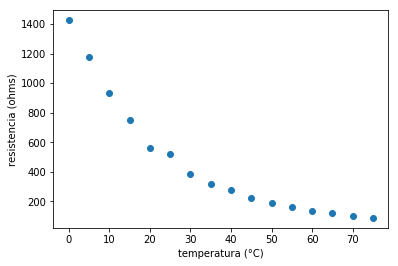

In [96]:
import matplotlib.pyplot as plt

plt.plot(temp, r1, "o")
plt.xlabel("temperatura (°C)")
plt.ylabel("resistencia (ohms)")
plt.show()

In [4]:
def covar(x,y):
    if len(x) != len(x):
        return
    xtotal = 0
    ytotal = 0
    
    for ix,iy in zip(x,y):
        xtotal += ix
        ytotal += iy
        
    xmedia = xtotal / len(x)
    ymedia = ytotal / len(y)
    
    total = 0    
    for ix,iy in zip(x,y):
        total += (ix - xmedia)*(iy - ymedia)
    covarianza = (total / len(x)) 
    return covarianza


print(covar(temp,r1))

print("\nNumpy:")
X = np.stack((temp, r1), axis=0)
print()
print(np.cov(X))
print("\n")
print(np.cov(X, bias=True))
print("\n")
print(np.cov(X, ddof=0))
print(np.cov(X, bias=True)[0][1])
print(np.cov(temp, r1, ddof=0)[0][1])

-8372.65625

Numpy:

[[   566.66666667  -8930.83333333]
 [ -8930.83333333 169340.39583333]]


[[   531.25        -8372.65625   ]
 [ -8372.65625    158756.62109375]]


[[   531.25        -8372.65625   ]
 [ -8372.65625    158756.62109375]]
-8372.65625
-8372.65625


Aunque la covarianza es similar a la correlación entre dos variables, difieren de las siguiente manera:
* Los coeficientes de **correlación** están estandarizado. Por tanto, una correlación perfecta da como resultado un coeficinete de 1. La correlación mide tanto la fuerza como la dirección de la relación entre dos variables.
* Los valores de **covarianza** no están estandarizados. Por consiguiente, la covarianza pude ir desde infinito negativo hasta infinito positivo. Por lo tanto, el valor de una relación perfecta depende de los datos. Puesto que los datos no están estandarizados, es difícil determinar la fuerza de la relación entre las variables.

## * Coeficiente de correlación lineal de Pearson $(\mathbf{r}_{xy})$
En estadística, el **coeficiente de correlación de Pearson** es una medida de la relación lineal entre dos variables aleatorias cuantivativas. A diferencia de la covarianza, la correlación de **Pearson** es independiente de la escala de medida de las variables.

De manera menos formal, el coeficiente de **Pearson** se define como un índice que pueda utilizarse para medir el grado de relación de dos variables siempre y cuando ambas sean cuantitativas y continuas.

$$ \mathbf{r}_{xy} = \frac{\mathbf{S}_{xy}}{\mathbf{S}_{x}\mathbf{S}_{y}} = \frac{n\sum_{i=1}^{n}x_{i}y_{i} - \sum_{i=1}^{n}x_{i}\sum_{i=1}^{n}y_{i}}{\sqrt{n\sum{x_{i}^{2}}- (\sum{x_{i}})^{2} } \sqrt{n\sum{y_{i}^{2}}- (\sum{y_{i}})^{2} }}$$

### Interpretación
El valor del índice de correlación **$(\mathbf{r}_{xy})$** varía en el intérvalo $[-1, 1]$, donde el signo indica el sentido de la relación:

* Si **r = 1**, existe una correlación positiva perfecta. El índice indica una dependencia total entre las dos variables denominada relación directa: cuando una de ellas aumenta, la otra también lo hace en proporción constante.
* Si **0 < r < 1**, existe una correlación positiva.
* Si **r = 0**, no existe relación lineal. Pero esto no necesariamente implica que las variables son independientes: pueden existir todavía relaciones no lineales entre las dos variables.
* Si **-1 < r < 0**, existe una correlación negativa.
* Si **r = -1**, existe una correlación negativa perfecta. El índice indica una dependencia total entre las dos variables llamada relación inversa: cuando una de ellas aumenta, la otra disminuye en proporción constante.

(Fuente: **Wikipedia**)

In [92]:
def cPearson(xx,yy,type):
    n = len(xx)
    x = np.zeros(n);   y = np.zeros(n)
    x2 = np.zeros(n); y2 = np.zeros(n)
    xy = np.zeros(n)
    
    lny= np.zeros(n)
    lny2= np.zeros(n)
    xlny= np.zeros(n)
    for i in range(n):
        x[i]=float(xx[i])
        y[i]=float(yy[i])
    sum_x, sum_y = (sum(x), sum(y))
    
    if(type=='lineal'):
        for i in range(n):
            xy[i]  = x[i]*y[i]
            x2[i]  = x[i]*x[i]
            y2[i]  = y[i]*y[i]
        sum_x2  = sum(x2); sum_y2  = sum(y2); sum_xy  = sum(xy)
        
        r = (n*sum_xy - sum_x*sum_y)/(np.sqrt(n*sum_x2 - sum_x**2)*np.sqrt(n*sum_y2 - sum_y**2))
        return r
    
        
p = cPearson(temp,r1,"lineal")
print(p)

pp = np.corrcoef(temp, r1)
print(pp)

-0.911691416633
[[ 1.         -0.91169142]
 [-0.91169142  1.        ]]


## * Regresión lineal

En estadística la **regresión lineal ** o **ajuste lineal** es un modelo matemático usado para aproximar la relación de dependencia entre una variable dependiente **y** e independiente **x**. Esta puede ser una dependencia causa efecto, por ejemplo, la cantidad de lluvia (causa), da lugar al aumento de la producción agrícola (efecto).

Si la distribución de los datos presentata una distribución lineal, entonces el modelo matemático está dado por la siguiente relación.

$y = ax + b$

donde de:
$$ \mathbf{a}=\frac{n\sum_{i=1}^{n}x_{i}y_{i} - \sum_{i=1}^{n}x_{i} \sum_{i=1}^{n}y_{i}}{n\sum_{i=1}^{n}x_{i}^{2} -(\sum_{i=1}^{n}x_{i})^{2}}
$$

$$ \mathbf{b}=\frac{\sum_{i=1}^{n}x_{i}^{2} \sum_{i=1}^{n}y_{i}  - \sum_{i=1}^{n}x_{i}y_{i}\sum_{i=1}^{n}x_{i}}{n\sum_{i=1}^{n}x_{i}^{2} -(\sum_{i=1}^{n}x_{i})^{2}}
$$

Si la distribución de los datos presentata una distribución nolineal, entonces el modelo matemático está dado por la siguiente relación.

$y = be^{ax}$

Esta relación es posible linealizar haciendo las siguientes operaciones:
$y = be^{ax}$

$ln(y = be^{ax})$

$lny = lnb + lne^{ax}$

$lny = ax + lnb$


/home/vrojas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


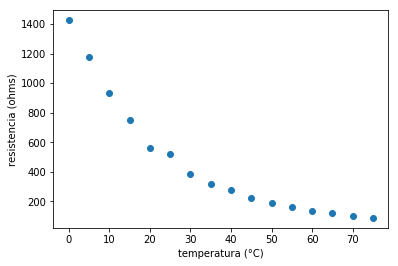

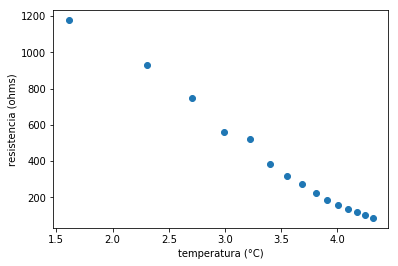

In [5]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(temp, r1, "o")
plt.xlabel("temperatura (°C)")
plt.ylabel("resistencia (ohms)")

plt.figure()
plt.plot(np.log(temp), r1, "o")
plt.xlabel("temperatura (°C)")
plt.ylabel("resistencia (ohms)")
plt.show()